# Turbofan Windmilling

Investigation into modelling turbofan windmilling effects in terms of N1 and N2 speed and the drag produced. Using **Gas Turbine Performance - 2nd edition, P.P. Walsh & P. Fletcher** as a reference.

## N1 Speed

![N Windmill Speed](images/WindmillRotationSpeeds.png)

Referred rotational speed for N1, N2.

$ \large  \frac{N}{\sqrt{\theta}} $

$ TAMB = 288.15 - 0.0065 * ALT $ for ALT < 11 000m

$ \large \theta = \frac{TAMB}{288.15} (1 + \frac{(\gamma - 1) M^2}{2}) $

For ambient temperatures $ \gamma = 1.4 $

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math

In [15]:
def TAMB(alt):
    return 288.15 - 0.0065 * alt

In [16]:
def Theta(tamb, mach):
    gamma = 1.4
    return (tamb/288.15) * (1 + ((gamma - 1) * mach**2)/2)

In [17]:
def NReferred(mach):
    if mach <= 0.4:
        return 50 * mach
    else:
        return 20 + (mach - 0.4) * 33

In [56]:
def plot(qbar, flow):
    plt.figure()
    
    Machs = np.arange(0, 1, 0.1)

    ftm = 0.3048

    machs = []
    N1s = []
    N1qbars = []
    N1flows = []

    # (alt ft, density slugs, speed of sound ft/s)
    Altitudes = [ 
        (0,     0.0023772,  1116.45), 
        (10000, 0.0017558,  1077.4044),
        (20000, 0.0012674,  1036.9291),
        (30000, 0.00089080, 994.8495)
    ]

    for altitudeInfo in Altitudes:
        machs.clear()
        N1s.clear()
        N1qbars.clear()
        N1flows.clear()
        alt, rho, ssound = altitudeInfo
        for mach in Machs:
                theta = Theta(TAMB(alt*ftm), mach)
                N1 = NReferred(mach) * math.sqrt(theta)
                N1qbar = (0.5 * rho * (mach * ssound)**2) / 10
                N1flow = rho * (mach * ssound) * 20

                N1s.append(N1)
                N1qbars.append(N1qbar)
                N1flows.append(N1flow)
                machs.append(mach)

        alt = (int)(alt/1000)
        if qbar:
            plt.plot(machs, N1qbars, label=f'qbar/10 {alt}kft', linestyle='--')
        if flow:
            plt.plot(machs, N1flows, label=f'flow*20 {alt}kft', linestyle='--')
        plt.plot(machs, N1s, label=f'Model {alt}kft')

    plt.legend()
    plt.show();

### Comparing Model to Current JSBSim qbar/10

<IPython.core.display.Javascript object>


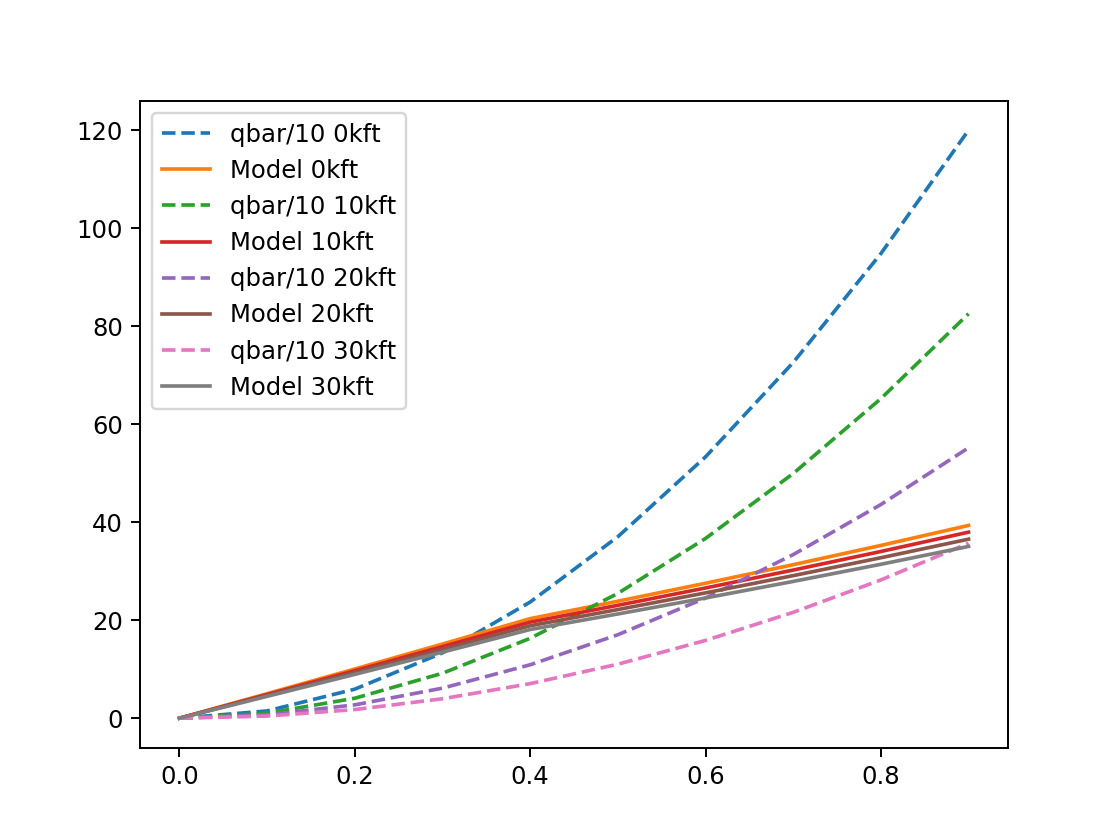

In [57]:
plot(qbar=True, flow=False)

### Comparing Model to Ram Airflow

<IPython.core.display.Javascript object>


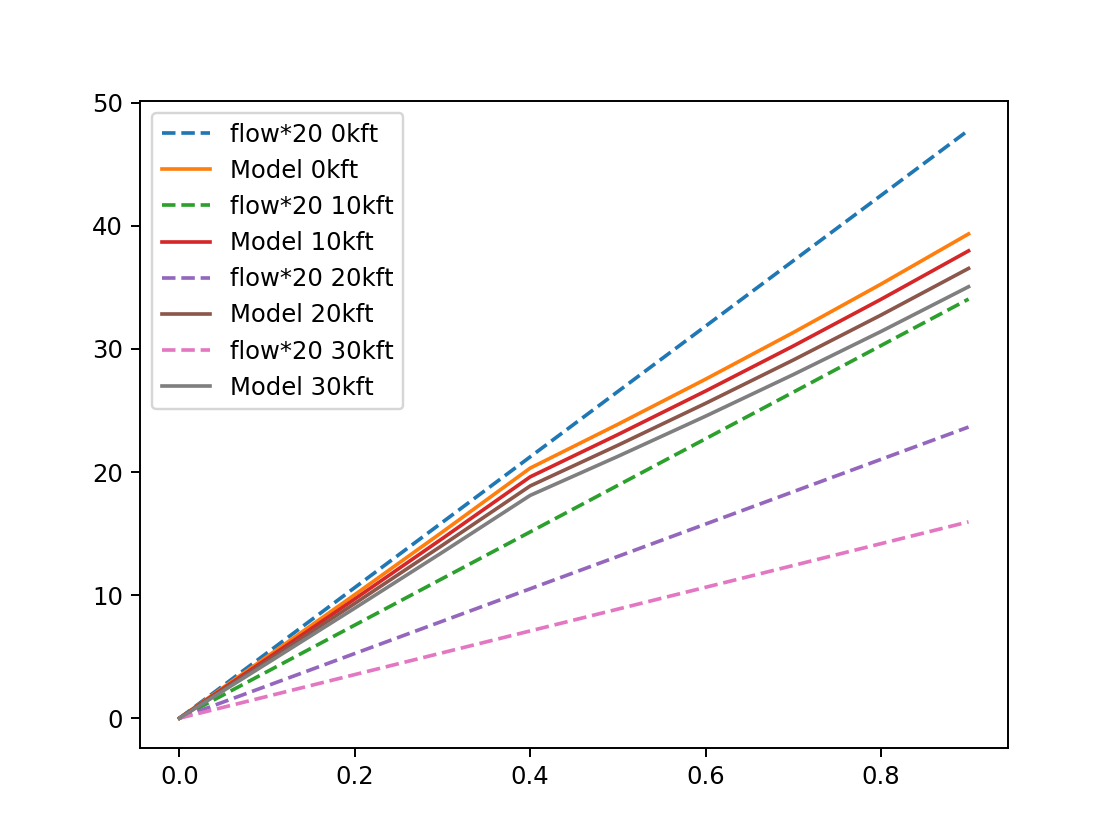

In [55]:
plot(qbar=False, flow=True)

## Drag